In [1]:
from surprise import Dataset
from surprise import Reader
from surprise import model_selection
from surprise.model_selection import cross_validate
#from surprise import evaluate, print_perf
#from surprise import print_perf
from surprise import SVD
from surprise import NMF
from surprise import KNNBasic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#load data from a file:Ques 3
file_path = os.path.expanduser('C:/Users/User/Documents/MachineLearning/MachineLearning/h7/restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)

In [38]:
#class surprise.model_selection.split.KFold(n_splits=3, random_state=None, shuffle=True)
algo = SVD()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
#print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9450  0.9471  0.9471  0.9464  0.0010  
MAE (testset)     0.7448  0.7472  0.7491  0.7471  0.0018  
Fit time          34.71   33.45   33.65   33.94   0.55    
Test time         2.77    2.62    2.45    2.61    0.13    


In [39]:
#data.split(n_folds=3)
algo = SVD(biased=False) #PMF
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
#print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9678  0.9740  0.9661  0.9693  0.0034  
MAE (testset)     0.7648  0.7677  0.7611  0.7645  0.0027  
Fit time          33.56   33.53   33.09   33.39   0.21    
Test time         2.13    1.92    2.11    2.05    0.10    


In [40]:
#NMF
algo = NMF()
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9743  0.9748  0.9850  0.9780  0.0049  
MAE (testset)     0.7658  0.7648  0.7744  0.7683  0.0043  
Fit time          30.36   31.11   30.02   30.50   0.46    
Test time         2.06    1.89    2.09    2.01    0.09    


In [41]:
algo = KNNBasic(sim_options = {'user_based': True})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9813  0.9922  0.9924  0.9886  0.0052  
MAE (testset)     0.7760  0.7815  0.7853  0.7809  0.0038  
Fit time          2.37    2.35    2.48    2.40    0.06    
Test time         35.94   35.68   36.55   36.06   0.37    


In [42]:
algo = KNNBasic(sim_options = {'user_based': False})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9844  0.9840  0.9885  0.9857  0.0020  
MAE (testset)     0.7766  0.7800  0.7860  0.7809  0.0039  
Fit time          3.36    3.24    3.32    3.31    0.05    
Test time         39.90   41.32   40.52   40.58   0.58    


In [43]:
#14
algo = KNNBasic(sim_options = {
'name':'MSD',
'user_based': True
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9889  0.9860  0.9893  0.9881  0.0015  
MAE (testset)     0.7811  0.7798  0.7831  0.7814  0.0014  
Fit time          2.62    2.38    2.42    2.47    0.10    
Test time         36.26   35.87   36.41   36.18   0.23    
{'test_rmse': array([0.98894576, 0.98597129, 0.98933365]), 'test_mae': array([0.78109846, 0.77982893, 0.78314984]), 'fit_time': (2.6182055473327637, 2.3842051029205322, 2.418004274368286), 'test_time': (36.25547242164612, 35.86647152900696, 36.41147303581238)}


In [44]:
algo = KNNBasic(sim_options = {
'name':'cosine',
'user_based': True
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0254  1.0161  1.0224  1.0213  0.0039  
MAE (testset)     0.8113  0.8052  0.8086  0.8084  0.0025  
Fit time          10.23   10.19   9.99    10.14   0.10    
Test time         36.23   36.63   35.94   36.27   0.28    
{'test_rmse': array([1.02535331, 1.01607739, 1.02237389]), 'test_mae': array([0.81134608, 0.80524424, 0.80862792]), 'fit_time': (10.225820302963257, 10.194620132446289, 9.992819547653198), 'test_time': (36.2252721786499, 36.62987303733826, 35.943471908569336)}


In [45]:
algo = KNNBasic(sim_options = {
'name':'pearson',
'user_based': True
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0160  1.0267  1.0192  1.0206  0.0045  
MAE (testset)     0.8079  0.8141  0.8082  0.8101  0.0029  
Fit time          13.17   13.36   13.29   13.27   0.08    
Test time         35.10   35.27   35.29   35.22   0.08    
{'test_rmse': array([1.01600187, 1.02673428, 1.01921113]), 'test_mae': array([0.80794457, 0.81413148, 0.80821708]), 'fit_time': (13.169026613235474, 13.358826160430908, 13.294426441192627), 'test_time': (35.1036696434021, 35.27267074584961, 35.29086971282959)}


In [46]:
#item_based
algo = KNNBasic(sim_options = {
'name':'MSD',
'user_based': False
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9871  0.9831  0.9854  0.9852  0.0016  
MAE (testset)     0.7830  0.7776  0.7808  0.7805  0.0022  
Fit time          3.18    3.23    3.26    3.22    0.03    
Test time         40.12   40.32   39.90   40.12   0.17    
{'test_rmse': array([0.98710603, 0.98311174, 0.98536993]), 'test_mae': array([0.78303182, 0.77756784, 0.78081048]), 'fit_time': (3.1798062324523926, 3.226606607437134, 3.2578063011169434), 'test_time': (40.12267994880676, 40.32188081741333, 39.90168046951294)}


In [47]:
algo = KNNBasic(sim_options = {
'name':'cosine',
'user_based': False
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0285  1.0445  1.0342  1.0357  0.0066  
MAE (testset)     0.8160  0.8305  0.8192  0.8219  0.0062  
Fit time          15.15   15.23   15.26   15.21   0.05    
Test time         40.62   40.25   40.01   40.29   0.25    
{'test_rmse': array([1.02849431, 1.04446382, 1.03422775]), 'test_mae': array([0.8160047 , 0.83051771, 0.81919699]), 'fit_time': (15.150230169296265, 15.228230237960815, 15.259430408477783), 'test_time': (40.621880769729614, 40.246480226516724, 40.012479305267334)}


In [48]:
algo = KNNBasic(sim_options = {
'name':'pearson',
'user_based': False
})
perf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
print(perf)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0469  1.0548  1.0434  1.0483  0.0048  
MAE (testset)     0.8384  0.8418  0.8364  0.8389  0.0022  
Fit time          20.68   20.79   20.84   20.77   0.06    
Test time         39.65   39.55   40.48   39.89   0.42    
{'test_rmse': array([1.04688621, 1.05476817, 1.04336007]), 'test_mae': array([0.83843619, 0.84183051, 0.83641021]), 'fit_time': (20.684041500091553, 20.79224181175232, 20.83904194831848), 'test_time': (39.65367889404297, 39.54547882080078, 40.478880882263184)}


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

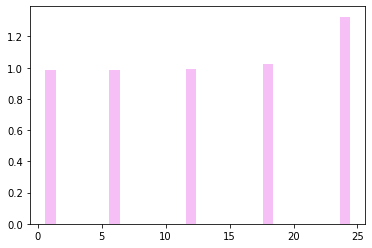

In [46]:
best = []
name=''
k=(1,6,12,18,24)
for kvalue in k:

    for algo in [(KNNBasic(k=kvalue, sim_options = {'name':'MSD', 'user_based': True }))]:
    
       
  
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
   
        bld = pd.DataFrame.from_dict(results).mean(axis=0)
        bld2 = bld.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algo']))
        best.append(bld2)
    
dr=pd.DataFrame(best).set_index('Algo').sort_values('test_rmse')
print(dr)
plt.bar(k,dr.test_rmse,color='violet',align='center', alpha=0.5)
plt.show()

In [38]:
dr

,test_rmse,fit_time,test_time
Algo,,,
KNNBasic,0.986093,2.357802,30.392405
KNNBasic,0.987234,2.367469,27.989268
KNNBasic,0.994616,2.401137,24.934093
KNNBasic,1.023224,2.467141,21.817915
KNNBasic,1.324962,2.457807,18.749072


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

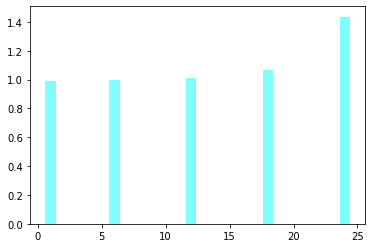

In [47]:
best = []
name=''
k=(1,6,12,18,24)
for kvalue in k:

    for algo in [(KNNBasic(k=kvalue, sim_options = {'name':'MSD', 'user_based': False }))]:
    
       
  
        results = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
   
        bld = pd.DataFrame.from_dict(results).mean(axis=0)
        bld2 = bld.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=['Algo']))
        best.append(bld2)
    
dr=pd.DataFrame(best).set_index('Algo').sort_values('test_rmse')
print(dr)
plt.bar(k,dr.test_rmse,color='cyan',align='center', alpha=0.5)
plt.show()